In [25]:
import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# tsv_files = glob.glob("data/*.tsv")
# dfs = []
# 
# for file in tsv_files:
#     df = pd.read_csv(file, sep="\t")
#     df["language"] = file.split("-")[-1].replace(".tsv", "")
#     dfs.append(df)

data = pd.read_csv("data/task-a-en.tsv", sep="\t")

## Data Overview

In [27]:
data.head()
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1200 non-null   object
 1   word1     1200 non-null   object
 2   word2     1200 non-null   object
 3   headline  1200 non-null   object
dtypes: object(4)
memory usage: 37.6+ KB


,id,word1,word2,headline
count,1200,1200,1200,1200
unique,1200,22,42,1101
top,en_1184,-,-,-
freq,1,1100,1100,100


## Change "-" placeholder with NaN

In [28]:
data = data.replace("-", np.nan)

print("Missing values per column:")
data.isna().sum()

Missing values per column:


id             0
word1       1100
word2       1100
headline     100
dtype: int64

## Types of constraints

In [29]:
def determine_constraint(row):
    if pd.isna(row["word1"]) and pd.isna(row["word2"]) and not pd.isna(row["headline"]):
        return "headline"
    elif pd.isna(row["headline"]) and not pd.isna(row["word1"]) and not pd.isna(row["word2"]):
        return "word_comb"
    else:
        return "error"

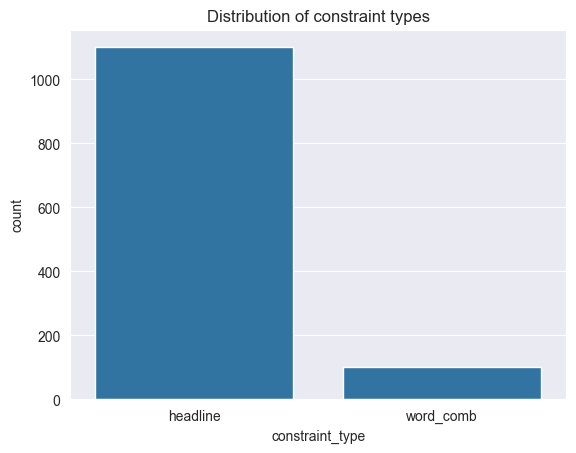

In [30]:
data["constraint_type"] = data.apply(determine_constraint, axis=1)
data["constraint_type"].value_counts()
sns.countplot(x="constraint_type", data=data)
plt.title("Distribution of constraint types")
plt.show()

## Analysis by constraint type

C:\Users\enbysenpai\AppData\Local\Temp\ipykernel_20976\4165503888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headline_data["length"] = headline_data["headline"].str.len()


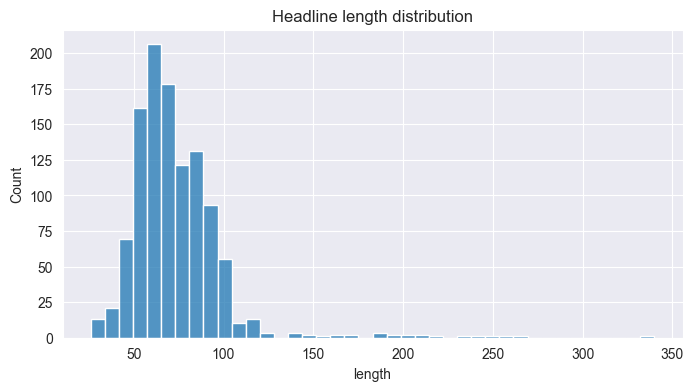

In [31]:
headline_data = data[data["constraint_type"] == "headline"]
headline_data["length"] = headline_data["headline"].str.len()
headline_data["length"].describe()
plt.figure(figsize=(8, 4))
sns.histplot(headline_data["length"], bins=40)
plt.title("Headline length distribution")
plt.show()

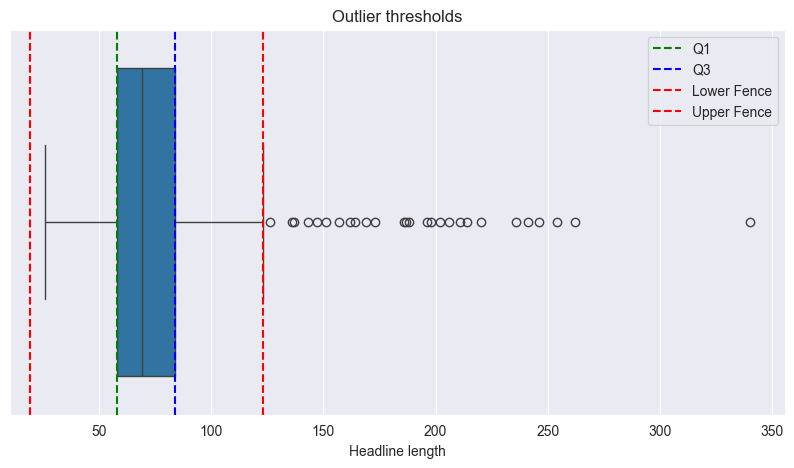

Outlier headlines: 27


,id,word1,word2,headline,constraint_type,length
224,en_0225,NaN,NaN,Americans are socialising less - here’s why th...,headline,173
249,en_0250,NaN,NaN,Optus customers left angry after more failed t...,headline,198
258,en_0259,NaN,NaN,Why Salah has become a 'little problem' for Li...,headline,188
260,en_0261,NaN,NaN,"Cyberattacks Upset British Life, Disrupting Ca...",headline,262
328,en_0329,NaN,NaN,Space weather satellites blast off to collect ...,headline,236


In [32]:
# Remove outliers (based on headline length)
q1 = headline_data["length"].quantile(0.25)
q3 = headline_data["length"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

plt.figure(figsize=(10, 5))

sns.boxplot(x=headline_data["length"])
plt.axvline(q1, color="green", linestyle="--", label="Q1")
plt.axvline(q3, color="blue", linestyle="--", label="Q3")
plt.axvline(lower, color="red", linestyle="--", label="Lower Fence")
plt.axvline(upper, color="red", linestyle="--", label="Upper Fence")

plt.title("Outlier thresholds")
plt.xlabel("Headline length")
plt.legend()
plt.show()

outliers = headline_data[(headline_data["length"] < lower) |
                         (headline_data["length"] > upper)]

print("Outlier headlines:", len(outliers))
outliers.head()

In [33]:
word_data = data[data["constraint_type"] == "word_comb"]
word_data["pair"] = word_data["word1"] + " + " + word_data["word2"]

print("Unique word pairs:", word_data["pair"].nunique())
word_data["pair"].value_counts().head()

Unique word pairs: 100


C:\Users\enbysenpai\AppData\Local\Temp\ipykernel_20976\3873170199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_data["pair"] = word_data["word1"] + " + " + word_data["word2"]


pair
spray + chair       1
hammer + banana     1
move + fridge       1
hammer + pumpkin    1
peel + pumpkin      1
Name: count, dtype: int64

## Language distribution

In [34]:
# plt.figure(figsize=(6, 4))
# sns.countplot(data=data, x="language")
# plt.title("Samples per Language")
# plt.show()

## Duplicates

In [35]:
print("Duplicate headlines:", headline_data["headline"].duplicated().sum())
print("Duplicate word pairs:", word_data["pair"].duplicated().sum())
headline_data = headline_data.drop_duplicates(subset=["headline"])

Duplicate headlines: 0
Duplicate word pairs: 0


# Reddit Jokes Based Dataset

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("one-million-reddit-jokes.csv")
print(f"Initial size: {len(df)}")

Initial size: 999998


In [46]:
df = pd.read_csv("jokes_clean.csv")

In [47]:
print("Total jokes:", len(df))
print("Columns:", df.columns.tolist())

Total jokes: 314138
Columns: ['id', 'selftext', 'word1', 'word2']


In [48]:
df["word_count"] = df["selftext"].str.split().str.len()
print("Joke length (words) stats:\n", df["word_count"].describe())

Joke length (words) stats:
 count    314138.000000
mean         54.555695
std         109.580371
min           5.000000
25%           9.000000
50%          16.000000
75%          59.000000
max        7612.000000
Name: word_count, dtype: float64


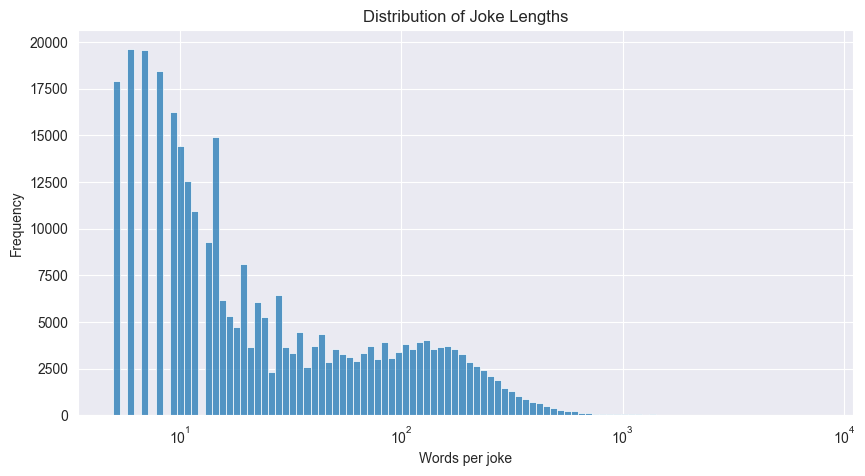

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(df["word_count"], bins=100, log_scale=(True, False))
plt.title("Distribution of Joke Lengths")
plt.xlabel("Words per joke")
plt.ylabel("Frequency")
plt.show()

In [40]:
print("Unique word1:", df["word1"].nunique())
print("Unique word2:", df["word2"].nunique())

Unique word1: 23641
Unique word2: 26749


In [41]:
df["pair"] = df["word1"] + " + " + df["word2"]
print("Unique keyword pairs:", df["pair"].nunique())
print("Top 10 keyword pairs:\n", df["pair"].value_counts().head(10))

Unique keyword pairs: 184258
Top 10 keyword pairs:
 pair
year + old         648
man + bar          566
guy + bar          410
husband + wife     399
old + man          392
little + johnny    359
donald + trump     347
little + boy       327
man + wife         326
son + dad          294
Name: count, dtype: int64


In [42]:
print("Duplicate jokes:", df["selftext"].duplicated().sum())
print("Duplicate keyword pairs:", df["pair"].duplicated().sum())

Duplicate jokes: 18898
Duplicate keyword pairs: 129880


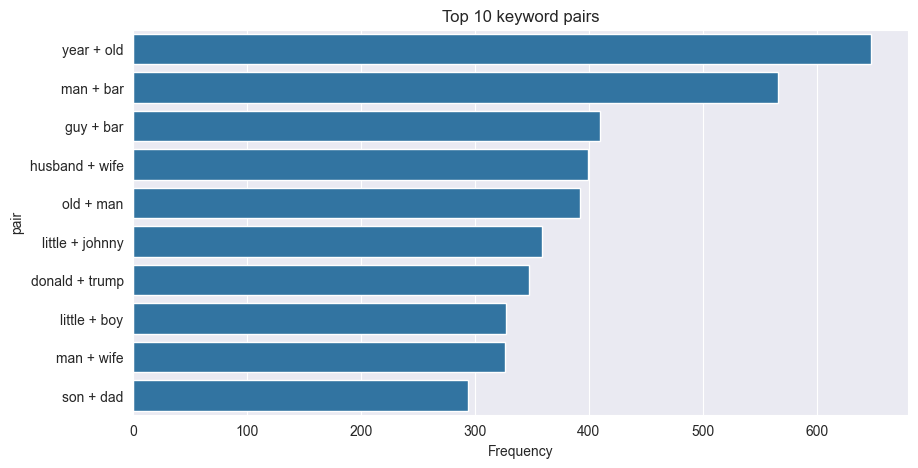

In [43]:
top_pairs = df["pair"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_pairs.values, y=top_pairs.index)
plt.title("Top 10 keyword pairs")
plt.xlabel("Frequency")
plt.show()